(sec:multi-armed-bandits)=
# Multi-armed bandits




## Learning outcomes

````{margin}
```{admonition} Video byte: Introduction to multi-armed bandits
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

The learning outcomes of this chapter are:

1. Select and apply multi-armed bandit algorithms for a given problem
2. Compare and contrast  the strengths a weaknesses of different multi-armed bandit algorithms

## Overview

````{margin}
```{admonition} Video byte: Intuition of multi-armed bandits
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=43s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

*Multi-armed bandit* techniques are not techniques for solving MDPs, but they are used throughout a lot of reinforcement learning techniques that do solve MDPs.

The problem of multi-armed bandits can be illustrated as follows:

> Imagine that you have $N$ number of slot machines (or poker machines in Australia), which are sometimes called *one-armed bandits*. Over  time, each bandit pays a random reward from an unknown probability distribution. Some bandits pay higher rewards than others. The goal is to maximize the sum of the rewards of a sequence of lever pulls of the  machine.

The question is: over an infinite period of time, without knowing the probability distribution beforehand, how should we select the arms. Multi-armed bandit techniques aim to solve this problem. 

## The multi-armed bandit problem

````{margin}
```{admonition} Video byte: Multi-armed bandits -- Definition
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=107s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

:::{admonition} Definition

A **multi-armed bandit** (also known as an **$N$-armed bandit**) is defined by a set of *random variables* $X_{i,k}$ where:

-   $1 \leq i \leq N$, such that $i$ is the *arm* of the bandit; and

-   $k$ the index of the *play* of arm $i$;

Successive plays $X_{i,1}, X_{j,2}, X_{k,3}\ldots$ are assumed to be independently distributed, but we do not know the probability distributions of the random variables.

The idea is that a gambler iteratively plays rounds, observing the reward from the arm after each round, and can adjust their strategy each time. The aim is to maximise the sum of the rewards collected over all  rounds.

Multi-arm bandit strategies aim to learn a *policy* $\pi(k)$, where $k$ is the play. 

:::

Given that we do not know the probability distributions, a simple strategy is simply to select the arm given a uniform distribution; that is, select each arm with the same probability. This is just uniform sampling.

Then, the Q-value for an action $a$ can be estimated using the following formula:

$$Q(a) = \frac{1}{N(a)} \sum_{i=1}^{t}  X_{a,i}$$

where $t$ is the number of rounds so far, $N(a)$ is the number of times $a$ selected in previous rounds, and $X_{a,i}$ is the *reward* obtained in the $i$-th round for playing arm $a$..

The idea here is that for a multi-armed bandit problem, we explore the options uniformly for some time, and then once we are confident we have enough samples (when the changes to the values of $Q(a)$ start to stabilise), we start selecting $\max_a Q(a)$. This is known as the *$\epsilon$-first* strategy, where the parameter $\epsilon$ (epsilon), determines how many rounds to select random actions before moving to the greedy action.

**But what is the issue?** Time is wasted equally in all actions using the uniform distribution. Why not focus also on the *most promising actions* given the rewards we have received so far.

## Exploration vs. Exploitation

````{margin}
```{admonition} Video byte: Exploration vs. exploitation
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=169s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

What we want is to play only the good actions; so just keep playing the actions that have given us the best reward so far. However, at first, we do not have information to tell us what the best actions are. Thus, we want strategies that *exploit* what we think are the best actions so far, but still *explore* other actions.

But how much should we exploit and how much should we explore? This is known as the *exploration vs. exploitation dilemma*. It is driven by the *The Fear of Missing Out* (FOMO). FOMO drives us to search for strategies that *minimise regret*.

:::{admonition} Definition --- Regret

Given a policy $\pi$ and $t$ number of arm pulls, regret is defined formally as:

 $$\mathcal {R(\pi, t) }  =  t \cdot \max_a Q^*(a) - \mathbb{E} [ \sum_{k=1}^{t} X_{\pi(k), k} ]$$

where $Q^*(a)$ is actual average return of playing arm $a$. We do not know $Q^*(a)$ of course -- otherwise we could simply play $ \max_a Q^*(a)$ each round.
:::

Informally: If we follow policy $\pi$ by playing arm $\pi(k)$ in round each round $k$, our regret over the $t$ pulls  is the *best possible cumulated reward* minus the *expected reward of playing using policy $\pi$*. So, regret is the *expected loss* from not taking the best action. If I take always action $\max_a Q^*(a)$ (the best action), my regret is 0. 

The aim of a multi-armed bandit strategy to learn a policy that minimises the total regret.

A *zero-regret* strategy is a strategy whose average regret each round approaches zero as the number of rounds approached infinity. So, this means that a zero-regret strategy will converge to an optimal strategy given enough rounds.

### Implementation

The implementation for each strategy we discuss inherits from the class `MultiArmedBandit`:

In [1]:
class MultiArmedBandit():

    """ Select an action for this state given from a list given a Q-function """

    def select(self, state, actions, qfunction):
        abstract

    """ Reset a multi-armed bandit to its initial configuration """

    def reset(self):
        self.__init__()


Each strategy must implement the  `select` method, which takes the list of available actions and their Q-values. The `reset`  method resets to the bandit to its initial configuration, and is used for demonstration purposes later.

(sec:multi-agent-bandit:simulation)=
### Simulation

````{margin}
```{admonition} Video byte: Simulation example
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=516s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

To demonstrate the effect of different multi-armed bandit strategies and their parameters, we use the following simple simulation. The simulation is an implementation of a simple multi-armed bandit problem with five actions, ```actions = [0, 1, 2, 3, 4]```.  Each action has a probability associated with it: ```probabilities = [0.1, 0.3, 0.7, 0.2, 0.1]```. The simulation runs  2000 *episodes* of a bandit problem, with each episode being 1000 *steps* long. At each step, the agent must chose an action. For the action `a` it chooses,  it receives a reward of 5 with a probability `probability[a]`.  With a probability of ```1 - probability[a]``` it receives a reward of 0. At the beginning of each episode, the bandit strategies are reset.

The simulation returns a list of lists, representing the reward received at each step of each episode. The aim for the bandit is to maximise the expected rewards over each episode.

In [2]:
from collections import defaultdict
import random
from qtable import QTable


""" Run a bandit algorithm for a number of episodes, with each episode
being a set length.
"""

def run_bandit(bandit, episodes=2000, episode_length=1000, drift=True):

    # The actions available
    actions = [0, 1, 2, 3, 4]

    # A dummy state
    state = 1

    rewards = []
    for _ in range(0, episodes):
        bandit.reset()

        # The probability of receiving a payoff of 1 for each action
        probabilities = [0.1, 0.3, 0.7, 0.2, 0.1]

        # The number of times each arm has been selected
        times_selected = defaultdict(lambda: 0)
        qtable = QTable()

        episode_rewards = []
        for step in range(0, episode_length):

            # Halfway through the episode, change the probabilities
            if drift and step == episode_length / 2:
                probabilities = [0.5, 0.2, 0.0, 0.3, 0.3]

            # Select an action using the bandit
            action = bandit.select(state, actions, qtable)

            # Get the reward for that action
            reward = 0
            if random.random() < probabilities[action]:
                reward = 5

            episode_rewards += [reward]

            times_selected[action] = times_selected[action] + 1
            qtable.update(
                state,
                action,
                (reward / times_selected[action])
                - (qtable.get_q_value(state, action) / times_selected[action]),
            )

        rewards += [episode_rewards]

    return rewards


## Solutions for minimising regret

There are several basic strategies for minimising regret. In each of these techniques, we record the average return of each arm over time. For consistency with the rest of these notes, we will call these Q-values, and will use $Q(a)$ to represent the Q value of arm $a$.

The multi-armed bandit solutions we will look at in these notes all follow the same basic format below, where $T$ is the number of rounds or pulls that we will play, which may be infinite, and $A$ is the set of arms available.

:::{admonition} Algorithm -- Abstract multi-armed bandit

**Input:** Multi-armed bandit problem $M = \langle \{X_{i,k}\}, A, T\rangle$\
**Output:** Q-function $Q$

$Q(a) \leftarrow 0$ for all arms $a \in A$\
$N(a) \leftarrow 0$ for all arms $a \in A$

$k \leftarrow 1$\
while $k \leq T$\
$\quad\quad$ $a \leftarrow \textrm{select}(k)$\
$\quad\quad$ Execute arm $a$ for round $k$ and observe reward $X_{a,k}$\
$\quad\quad$ $N(a) \leftarrow N(a) + 1$\
$\quad\quad$ $Q(a) \leftarrow Q(a) + \frac{1}{N(a)}[X_{a,k} - Q(a)]$\
$\quad\quad$ $k \leftarrow k + 1$

:::

So, these algorithms choose an arm, and then add the reward from that to a cumulative average of playing that arm so far. 

The key difference between the solutions we will look at is how the $\textrm{select}$ function is implemented. This is what determines the policy $\pi(k)$ for the multi-armed bandit problem.

### Epsilon-greedy strategy

````{margin}
```{admonition} Video byte: Epsilon greedy
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=594s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

The $\epsilon$-greedy strategy  is a simple and effective way of balancing exploration and exploitation. In this algorithm, the parameter $\epsilon \in [0,1]$ (pronounced "epsilon") controls how much we explore and how much we exploit. 

Each time we need to choose an action, we do the following:

- With probability $1-\epsilon$ we choose the arm with the maximum Q value: $\textrm{argmax}_a Q(a)$. If there is a tie between multiple actions with the larget Q-value, break the tie randomly.
- With probability $\epsilon$ we choose a random arm with uniform probability.

The best value for $\epsilon$ depends on the particular problem, but typically, values around 0.05-0.1 work well as they exploit what they have learnt, while still exploring.

#### Implementation

The implementation for epsilon greedy uses `random()` to select a random number between 0 and 1. If that number is less than epsilon, an action is randomly selected. If r is greater than or equal to epsilon, it finds the actions with the maximum Q value, breaking ties randomly:

In [3]:
import random
from multi_armed_bandit.multi_armed_bandit import MultiArmedBandit


class EpsilonGreedy(MultiArmedBandit):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon

    def reset(self):
        pass

    def select(self, state, actions, qfunction):
        # Select a random action with epsilon probability
        if random.random() < self.epsilon:
            return random.choice(actions)
        (arg_max_q, _) = qfunction.get_max_q(state, actions)
        return arg_max_q


The following plot shows the reward for each step, averaged over 2000 episodes, over the simulation described in the [](sec:multi-agent-bandit:simulation) section. Each episode is 1000 steps long. We evaluate different values of epsilon:

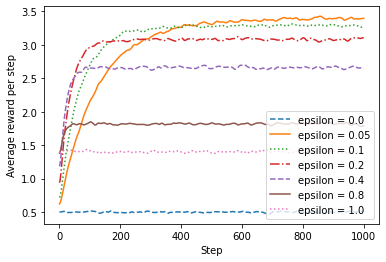

In [4]:
from multi_armed_bandit.epsilon_greedy import EpsilonGreedy
from tests.multi_armed_bandit_tests.run_bandit import run_bandit
from tests.plot import Plot


def plot_epsilon_greedy(drift=False):
    epsilon000 = run_bandit(EpsilonGreedy(epsilon=0.00), drift=drift)
    epsilon005 = run_bandit(EpsilonGreedy(epsilon=0.05), drift=drift)
    epsilon01 = run_bandit(EpsilonGreedy(epsilon=0.1), drift=drift)
    epsilon02 = run_bandit(EpsilonGreedy(epsilon=0.2), drift=drift)
    epsilon04 = run_bandit(EpsilonGreedy(epsilon=0.4), drift=drift)
    epsilon08 = run_bandit(EpsilonGreedy(epsilon=0.8), drift=drift)
    epsilon10 = run_bandit(EpsilonGreedy(epsilon=1.0), drift=drift)

    Plot.plot_rewards(
        [
            "epsilon = 0.0",
            "epsilon = 0.05",
            "epsilon = 0.1",
            "epsilon = 0.2",
            "epsilon = 0.4",
            "epsilon = 0.8",
            "epsilon = 1.0",
        ],
        [epsilon000, epsilon005, epsilon01, epsilon02, epsilon04, epsilon08, epsilon10],
    )


plot_epsilon_greedy()


As we can see, higher  values of epsilon tend to have a lower reward over time, except that we need some non-zero value of epsilon. Higher values mean more exploration, so the bandit spends more time exploring less valuable actions, even after it has a good estimate of the value of actions. The actual choice of the epsilon parameter is entirely dependent on the particular application: there is no magic number. However, as in this particular case, an epsilon between 0.05-0.1 is usually a reasonable choice.

But we can also see that while epsilon = 0.05 ends up with a higher return after about 350 steps, initially it does not do as well as epsilon = 0.1, because it does not explore enough. Can we do better? Yes, we can! 

### Epsilon-decreasing strategy

````{margin}
```{admonition} Video byte: Epsilon decreasing
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=712s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

This follows a similar idea to epsilon greedy, however, it recognises that initially, we have very little feedback so exploiting is not a good strategy to being with: we need to explore first. Then, as we gather more data, we should exploit more.

The epsilon-decreasing strategy does this by taking the basic epsilon greedy strategy and introducing another parameter $\alpha \in [0,1]$ (pronounced "alpha"), which is used to decrease $\epsilon$ over time. For this reason, $\alpha$ is called the *decay*.

The selection mechanism is the same as epsilon greedy, but then after each selection, we set  $\epsilon := \epsilon \times \alpha$. We start initially with a higher value of $\epsilon$ to explore, and it will slowly decay to a low number such that we explore less and less as we gather more feedback.

#### Implementation

The following implementation for the epsilon-decreasing strategy uses the epsilon-greedy strategy, just decreasing the epsilon value each step:

In [5]:
from multi_armed_bandit.multi_armed_bandit import MultiArmedBandit
from multi_armed_bandit.epsilon_greedy import EpsilonGreedy


class EpsilonDecreasing(MultiArmedBandit):
    def __init__(self, epsilon=0.2, alpha=0.999):
        self.epsilon_greedy_bandit = EpsilonGreedy(epsilon)
        self.initial_epsilon = epsilon
        self.alpha = alpha

    def reset(self):
        self.epsilon_greedy_bandit = EpsilonGreedy(self.initial_epsilon)

    def select(self, state, actions, qfunction):
        result = self.epsilon_greedy_bandit.select(state, actions, qfunction)
        self.epsilon_greedy_bandit.epsilon *= self.alpha
        return result


The following plot shows the average reward over our simulation, varying the value of $\alpha$:

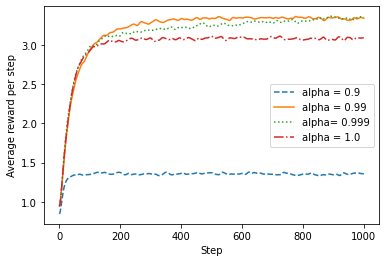

In [6]:
from multi_armed_bandit.epsilon_decreasing import EpsilonDecreasing
from tests.multi_armed_bandit_tests.run_bandit import run_bandit
from tests.plot import Plot


def plot_epsilon_decreasing(drift=False):
    alpha09 = run_bandit(EpsilonDecreasing(alpha=0.9), drift=drift)
    alpha099 = run_bandit(EpsilonDecreasing(alpha=0.99), drift=drift)
    alpha0999 = run_bandit(EpsilonDecreasing(alpha=0.999), drift=drift)
    alpha1 = run_bandit(EpsilonDecreasing(alpha=1.0), drift=drift)

    Plot.plot_rewards(
        ["alpha = 0.9", "alpha = 0.99", "alpha= 0.999", "alpha = 1.0"],
        [alpha09, alpha099, alpha0999, alpha1],
    )


plot_epsilon_decreasing()


This indicates that for this particular problem, a value of 0.99 for alpha has a better average return  than lower values. This is because a lower value, such as 0.9, will result in epsilon approaching zero before we have explored enough. However, the choice of alpha depends both on the particular problem, and also the expected length of each episode: for longer episodes, decreasing slower would be more beneficial so we do not stop exploring too early.

### Softmax strategy

````{margin}
```{admonition} Video byte: Softmax
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=820s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

Softmax is *probability matching strategy*, which means that the probability of each action being chosen is dependent on its Q-value so far. Formally, softmax chooses an action because on the *Boltzman* distribution for that action:

$$\frac{e^{Q(a)/\tau}}{\sum_{b=1}^{N} e^{Q(b)/\tau}}$$ 

where $N$ is the number of arms, and $\tau >  0$ (pronounced "tau") is the *temperature*, which dictates how much of an influence the past data has on the decision. A higher value of $\tau$ would mean that the probability of selecting each action is close to each other (as $\tau$ approaches infinity, softmax approaches a uniform strategy), while a lower value of $\tau$ would imply that the probabilities are closer to their Q values. When $\tau=1$, the probabilities are just $e^{Q(a)}$, and as $\tau$ approaches 0, softmax approaches a greedy strategy.

As with the epsilon-decreasing strategy, we can add a decay parameter $\alpha$ that allows the value of $\tau$ to decay until it reaches 1. This encourages exploration in earlier phases, and exploration less as we gather more feedback.

#### Implementation

The following implementation of the softmax strategy uses ```random()``` to generate a random number between 0 and 1, and divides this space 0-1 among the set of actions based on the value of $e^{Q(a)/\tau}$:

In [7]:
import math
import random
from multi_armed_bandit.multi_armed_bandit import MultiArmedBandit


class Softmax(MultiArmedBandit):
    def __init__(self, tau=1.0):
        self.tau = tau

    def reset(self):
        pass

    def select(self, state, actions, qfunction):

        # calculate the denominator for the softmax strategy
        total = 0.0
        for action in actions:
            total += math.exp(qfunction.get_q_value(state, action) / self.tau)

        rand = random.random()
        cumulative_probability = 0.0
        result = None
        for action in actions:
            probability = (
                math.exp(qfunction.get_q_value(state, action) / self.tau) / total
            )
            if cumulative_probability <= rand <= cumulative_probability + probability:
                result = action
            cumulative_probability += probability

        return result


As before, we plot the average reward at each step of our simulation, this time varying values of tau:

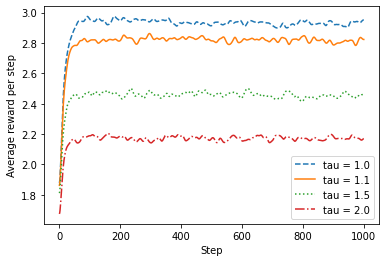

In [8]:
from multi_armed_bandit.softmax import Softmax
from tests.multi_armed_bandit_tests.run_bandit import run_bandit
from tests.plot import Plot


def plot_softmax(drift=False):
    tau10 = run_bandit(Softmax(tau=1.0), drift=drift)
    tau11 = run_bandit(Softmax(tau=1.1), drift=drift)
    tau15 = run_bandit(Softmax(tau=1.5), drift=drift)
    tau20 = run_bandit(Softmax(tau=2.0), drift=drift)

    Plot.plot_rewards(
        ["tau = 1.0", "tau = 1.1", "tau = 1.5", "tau = 2.0"],
        [tau10, tau11, tau15, tau20],
    )


plot_softmax(drift=False)


In this particular case, we see that tau = 1.0 is a good choice, which means that the probability of selecting an action is directly proportional to  $e^{Q(a)}$. So, why should we use tau at all? 

The softmax strategy is designed to work well under *drift*; that is, when the underlying probability distributions (in this case, the probability of receiving a reward) change over time. In many real problems, the underlying probability distributions are not static. For example, if we are using a multi-armed bandit to determine which products to show to people visiting our website, where the reward is whether they click on the product link, the preferences of our visitors will change over time, depending on e.g. the news cycle, the weather, fashion, etc. Sometimes, preferences can change very quickly.

So, what happens if we change the value of our underlying probabilities? In the following evaluation, we change the probabilities of the underlying actions at the halfway point of each episode, from ```probabilities = [0.1, 0.3, 0.7, 0.2, 0.1]``` to ```probabilities = [0.5, 0.2, 0.0, 0.3, 0.3]```.  This is a sudden change in which the Q-values are almost worthless.

If we plot the performance of the softmax algorithm with this, the results are as follows:

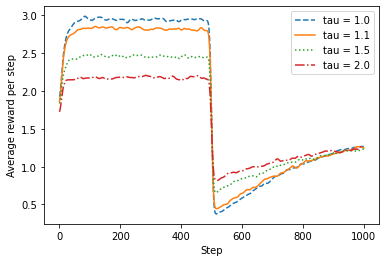

In [9]:
plot_softmax(drift=True)

As one can see, the strategies that are less "commited" to their Q-values are less affected by the sudden change. Of course, if the drift is more gradual, values closer to 1.0 may be more suitable.

### Upper Confidence Bounds (UCB1)

````{margin}
```{admonition} Video byte: Upper Confidence Bounds (UCB1)
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=1105s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

A highly effective multi-armed bandit strategy is the *Upper Confidence Bounds* (UCB1) strategy.

Using the UCB1 strategy, we select the next action  using the following:

$$\textrm{argmax}_{a}\left(Q(a)   +   \sqrt{\frac{2 \ln t}{N(a)}}\right)$$

where $t$ is the number of rounds so far, and $N(a)$ is the number of times times $a$ has been chosen in all previous rounds. The term inside the square root is undefined if $N(a) = 0$. The avoid this, the typical strategy is to spend the first $N$ rounds to select each of the $N$ bandits once.

The left--hand side encourages exploitation: the Q-value is high for actions that have had a high reward.

The right--hand side encourages exploration: it is high for actions that have been explored less -- that is, when $N(a)$ relative to other actions.

Interesting, the UCB formula is not a weighted formula -- that is, there is no parameter giving weight to the $Q(a)$ or the square root expressions to balance exploration vs. exploitation. So how does it work? We will not get into all the details, but instead just give some intuition.

We want to learn the Q-function, which gives us the average return on each action $a$, such that it approximates the real (unknown) Q-function, which we will call $Q^*$. At each round, we select the action $a$ that maximises the expression inside the brackets. If arm $a$ is optimal, then we want the following to hold for all actions $b \neq a$:

$$Q(b) + \sqrt{\frac{2 \ln t}{N(b)}} \leq Q^*(a)$$

If this holds, we have some confidence that $Q(a)$ is optimal. If $N(b)$ is low for some actions, we do not have this confidence. 

If by chance the above expression does NOT hold for the optimal action $a$, then $a$ is not chosen, but it should be. We want this to occur only with probability $\frac{1}{N}$ to minimise pseudo-regret. This leads us to $\ln t$ in the expression. We will not go into the technicalities of why $\ln t$ in these notes.

#### Implementation

In [10]:
import math
import random
from multi_armed_bandit.multi_armed_bandit import MultiArmedBandit


class UpperConfidenceBounds(MultiArmedBandit):
    def __init__(self):
        self.total = 0
        # number of times each action has been chosen
        self.times_selected = {}

    def select(self, state, actions, qfunction):

        # First execute each action one time
        for action in actions:
            if action not in self.times_selected.keys():
                self.times_selected[action] = 1
                self.total += 1
                return action

        max_actions = []
        max_value = float("-inf")
        for action in actions:
            value = qfunction.get_q_value(state, action) + math.sqrt(
                (2 * math.log(self.total)) / self.times_selected[action]
            )
            if value > max_value:
                max_actions = [action]
                max_value = value
            elif value == max_value:
                max_actions += [action]

        # if there are multiple actions with the highest value
        # choose one randomly
        result = random.choice(max_actions)
        self.times_selected[result] = self.times_selected[result] + 1
        self.total += 1
        return result


Because UCB does not have parameters, there is no exploration to be done, however, in the next section we compare UCB with the other three strategies.

### Comparison

````{margin}
```{admonition} Video byte: Comparison multi-armed bandit solutions
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=1217s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

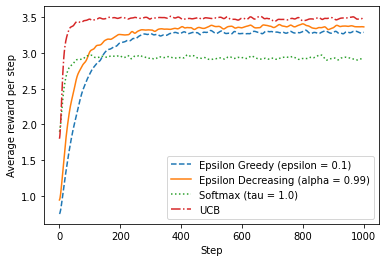

In [11]:
from multi_armed_bandit.epsilon_greedy import EpsilonGreedy
from multi_armed_bandit.epsilon_decreasing import EpsilonDecreasing
from multi_armed_bandit.softmax import Softmax
from multi_armed_bandit.ucb import UpperConfidenceBounds
from tests.multi_armed_bandit_tests.run_bandit import run_bandit
from tests.plot import Plot


def plot_comparison(drift=False):
    epsilon_greedy = run_bandit(EpsilonGreedy(epsilon=0.1), drift=drift)
    epsilon_decreasing = run_bandit(EpsilonDecreasing(alpha=0.99), drift=drift)
    softmax = run_bandit(Softmax(tau=1.0), drift=drift)
    ucb = run_bandit(UpperConfidenceBounds(), drift=drift)

    Plot.plot_rewards(
        [
            "Epsilon Greedy (epsilon = 0.1)",
            "Epsilon Decreasing (alpha = 0.99)",
            "Softmax (tau = 1.0)",
            "UCB",
        ],
        [epsilon_greedy, epsilon_decreasing, softmax, ucb],
    )


plot_comparison(drift=False)


We can see from this that UCB1, on average, obtains the highest  reward for the simulation. If we extend the simulation episodes to be longer, we would see that eventually epsilon decreasing would start to achieve similar rewards to UCB1, but it takes longer to converge to this.

From this, we may answer the question why softmax is considered a good strategy at all: it clearly does not perform well compared to the others. However, as noted already, softmax is able to adjust to drift more quickly, as is demonstrated when we suddenly change the probabilities as we did earlier:

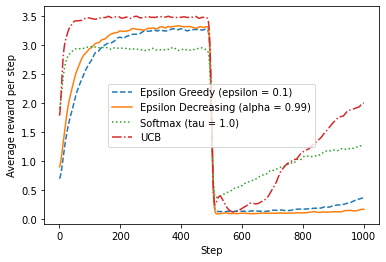

In [12]:
plot_comparison(drift=True)


From this comparison, we can see that softmax, even with tau = 1.0, adapts more quickly than other strategies. UCB1 recovers quite quickly too, soon out-performing softmax. For UCB1, the Q-values for the actions that were previous good are no longer good, thus encouraging exploration to other actions, but also, those that had poor Q-values but are now good actions would not have been visited as much previously, which also encourages exploration. Epsilon decreasing never recovers because by the time the probabilities change, epsilon is low and it is committed to those values. For that reason, the epsilon-decreasing strategy is good only for static problems.

While in this particular case, UCB1 has a higher average reward over the entire episode, this may not be the case if the underlying probability distributions change or drift regularly. In those cases, softmax may be a better choice.

## Summary

````{margin}
```{admonition} Video byte: Summary of multi-armed bandits
<iframe width="248" height="141" src="https://www.youtube.com/embed/Bop3xbVCnyc?t=1334s" title="Multi-armed bandits" frameborder="1" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
```
````

- Multi-armed bandits are problems in where we must make a selection from a set of options, but we do not know the probability of success (or the expected return) of each options

- Several techniques can be used to solve these. This chapter looks at just a few: $\epsilon$-greedy, $\epsilon$-decreasing, softmax, and UCB1 strategy. 

- In a simple experiment, we found that UCB1 was the fastest learner and recovered from shift quickly. However, this is just one experiment -- other domains will have different properties.

## Further reading

[Regret Analysis of Stochastic and Nonstochastic Multi-armed Bandit Problems](https://arxiv.org/abs/1204.5721). Sébastien Bubeck and Nicolo Cesa--Bianchi, *Machine Learning* 5(1): 1-122, 2012

-   A great analysis of multi-armed bandits.